# word2vec

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
news = pd.read_csv('../Data/news_classification_Feb29_24.csv')
test = pd.read_csv('../Data/test_set_Feb29_2024.csv')

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
X_train_text, X_val_text, y_train, y_val = train_test_split(news.text, news.label, test_size=0.1, random_state=42, stratify=news.label)
X_test_text = test.text
y_test = test.label

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [5]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

In [6]:
# Apply the preprocessing to your DataFrame
X_train_preprocess_text = X_train_text.apply(preprocess_text)
X_val_preprocess_text = X_val_text.apply(preprocess_text)
X_test_preprocess_text = X_test_text.apply(preprocess_text)

In [7]:
X_train_preprocess_text.head()

21148    [republican, senator, orrin, hatch, tried, jus...
23363    [frauke, petry, alternative, germany, said, tu...
19607    [month, ago, people, started, noticing, large,...
6139     [australia, domestic, spy, chief, warned, univ...
75       [news, cycle, filled, bad, news, lately, weari...
Name: text, dtype: object

**processed_text is list of tokens for each row (each news).**

In [8]:
sentences_train = X_train_preprocess_text.tolist()

**sentences_train is list of lists, each list in it is a list of tokens for each row.**

In [9]:
len(sentences_train) # totally 37546 news for train

33791

**train the model, just like fit**

In [10]:
model_wv = Word2Vec(sentences_train, vector_size=300, window=5, min_count=1, workers=4)

In [11]:
model_wv.wv

**wordvec have no attribute dv, only have wv.**

In [12]:
def vectorize_text(text, model):
    vectorized_text = []
    for word in text:
        if word in model.wv:
            vectorized_text.append(model.wv[word])
    return vectorized_text

**vectorize the text, this operation just like map, map each word to its vector in trained model, just like transform**

In [13]:
#transform the train set
X_train_vectorize_text = X_train_preprocess_text.apply(lambda x: vectorize_text(x, model_wv))
#transform the val set
X_val_vectorize_text = X_val_preprocess_text.apply(lambda x: vectorize_text(x, model_wv))
#transform the test set
X_test_vectorize_text = X_test_preprocess_text.apply(lambda x: vectorize_text(x, model_wv))

In [14]:
X_train_vectorize_text.head()

21148    [[-0.47033793, -1.2404827, 0.2301235, 0.462751...
23363    [[-0.07582359, 0.08970366, 0.007814016, 0.0865...
19607    [[-0.47298494, 0.35865366, 1.450446, -0.011671...
6139     [[0.24401316, 0.44754714, 0.048423946, -0.8564...
75       [[-0.061239183, -0.071097516, 0.3609223, 0.413...
Name: text, dtype: object

**vectorized_text is list of arrays, each array in it is a vector for each word with dimension 1000. each vectorized_text have different rows (# of words is different) but same columns 300.**

In [15]:
X_train = X_train_vectorize_text.apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_wv.vector_size)).values    
# there maybe empty list in vectorized_text
X_val = X_val_vectorize_text.apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_wv.vector_size)).values
# there maybe empty list in vectorized_text
X_test = X_test_vectorize_text.apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_wv.vector_size)).values

In [16]:
X_train = np.vstack(X_train)
X_val = np.vstack(X_val)
X_test = np.vstack(X_test)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_val_pred = lr_model.predict(X_val)

# Evaluate the model
accuracy_val = accuracy_score(y_val, y_val_pred)

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [18]:
accuracy_val

0.9528628495339547

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

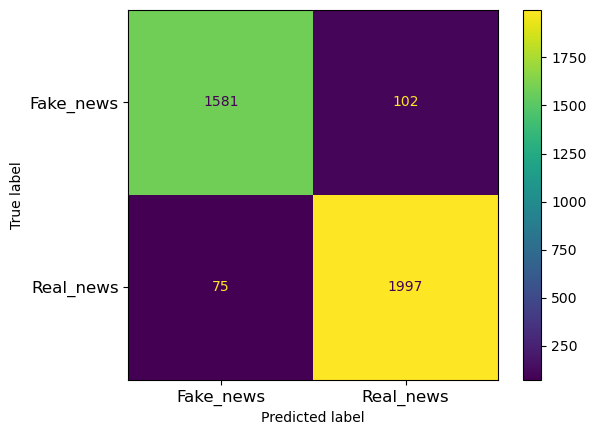

In [19]:
cm = confusion_matrix(y_val, y_val_pred, labels = lr_model.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

In [20]:
# Make predictions
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [21]:
accuracy_test

0.88

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

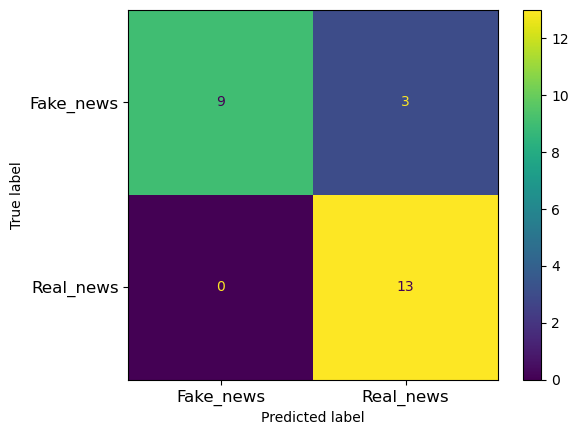

In [22]:
cm = confusion_matrix(y_test, y_test_pred, labels = lr_model.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

# doc2vec

Word2Vec and Doc2Vec are both popular models for learning vector representations of words and documents, but they serve different purposes and have distinct architectures.

**Word2Vec:**

Purpose: Word2Vec is designed to generate vector representations embeddings for individual words in a given corpus.

<font color=red>Architecture: It uses a shallow neural network to learn distributed representations of words based on their contexts. Two popular architectures within Word2Vec are Skip-Gram and Continuous Bag of Words (CBOW).

Training: The training process involves predicting the context words given a target word (Skip-Gram) or predicting a target word given its context (CBOW).

Output: The output of Word2Vec is a set of vectors, each representing a word in the vocabulary. These vectors capture semantic relationships between words.    

**Doc2Vec:**

Purpose: Doc2Vec extends the idea of Word2Vec to generate vector representations for entire documents.

<font color=red>Architecture: It also uses a neural network but incorporates an additional paragraph (document) vector. It learns to predict words in a similar manner to Word2Vec but includes a unique vector for each document.

Training: In Doc2Vec, the model is trained to predict context words given a target word within a specific document. Each document is assigned a unique identifier, and a vector representation is learned for each document along with the word vectors.

Output: The output of Doc2Vec is a set of vectors, each representing a document in the corpus, in addition to the word vectors. This allows capturing document-level semantics.

In summary, while Word2Vec focuses on learning word embeddings, Doc2Vec extends this concept to learn embeddings for entire documents. Both models are trained to capture semantic relationships based on the contextual usage of words but operate at different levels of granularity—word level for Word2Vec and document level for Doc2Vec. The trained objects in both cases may involve lists of tokens, but their interpretations and applications differ. Word2Vec provides vectors for words, while Doc2Vec provides vectors for entire documents.

## use doc2vec's doc vectors directly

In [23]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [24]:
tagged_data_train = [TaggedDocument(words=doc, tags=[f'train_{i}']) for i, doc in enumerate(X_train_preprocess_text)]

**tagged_data_train is almost same as sentence_train, also one list of tokens for one news, except have tag**

In [25]:
len(tagged_data_train)

33791

In [26]:
model_dv = Doc2Vec(tagged_data_train, vector_size=300, window=5, min_count=1, workers=4)

In [27]:
model_dv.dv

In [28]:
model_dv.wv

In [29]:
tagged_data_val = [TaggedDocument(words=doc, tags=[f'val_{i}']) for i, doc in enumerate(X_val_preprocess_text)]
tagged_data_test = [TaggedDocument(words=doc, tags=[f'test_{i}']) for i, doc in enumerate(X_test_preprocess_text)]

In [30]:
doc_vectors_train = [model_dv.dv[f'train_{i}'] for i in range(len(tagged_data_train))]
doc_vectors_val = [model_dv.infer_vector(tagged_data.words) for tagged_data in tagged_data_val]
doc_vectors_test = [model_dv.infer_vector(tagged_data.words) for tagged_data in tagged_data_test]

**doc_vectors_train is list of arrays**    
**doc_vectors_val is list of arrays**         
**doc_vectors_test is list of arrays** 

In [31]:
X_train = np.vstack(doc_vectors_train)
X_val = np.vstack(doc_vectors_val)
X_test = np.vstack(doc_vectors_test)

In [32]:
X_train.shape, X_val.shape, X_test.shape

((33791, 300), (3755, 300), (25, 300))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
lr_model_2 = LogisticRegression(max_iter=1000)

# Train the model
lr_model_2.fit(X_train, y_train)

# Make predictions
y_val_pred = lr_model_2.predict(X_val)

# Evaluate the model
accuracy_val = accuracy_score(y_val, y_val_pred)

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [34]:
accuracy_val

0.9017310252996006

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

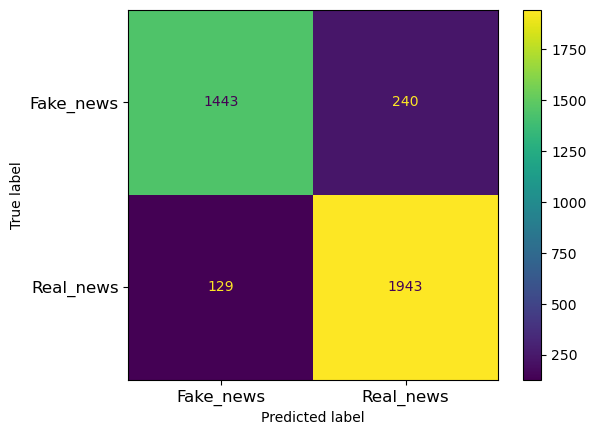

In [35]:
cm = confusion_matrix(y_val, y_val_pred, labels = lr_model_2.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

In [36]:
# Make predictions
y_test_pred = lr_model_2.predict(X_test)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [37]:
accuracy_test

0.88

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

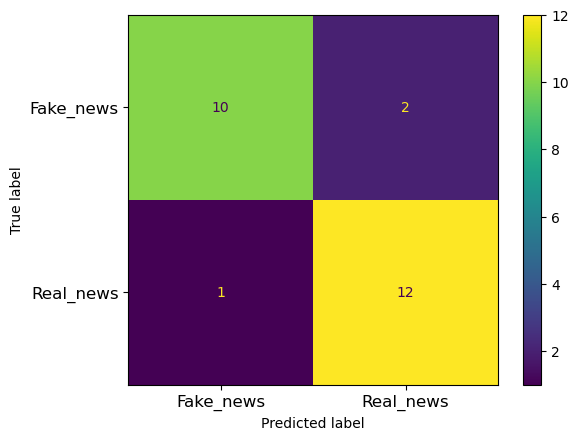

In [38]:
cm = confusion_matrix(y_test, y_test_pred, labels = lr_model_2.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

## use doc2vec's word vector

In [39]:
X_train_vectorize_text_2 = X_train_preprocess_text.apply(lambda x: vectorize_text(x, model_dv))
X_val_vectorize_text_2 = X_val_preprocess_text.apply(lambda x: vectorize_text(x, model_dv))
X_test_vectorize_text_2 = X_test_preprocess_text.apply(lambda x: vectorize_text(x, model_dv))

In [40]:
X_train = X_train_vectorize_text_2.apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_dv.vector_size)).values    
# there maybe empty list in vectorized_text
X_val = X_val_vectorize_text_2.apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_dv.vector_size)).values    
# there maybe empty list in vectorized_text
X_test = X_test_vectorize_text_2.apply(lambda x: np.mean(x, axis=0) if x else np.zeros(model_dv.vector_size)).values
# there maybe empty list in vectorized_text

In [41]:
X_train = np.vstack(X_train)
X_val = np.vstack(X_val)
X_test = np.vstack(X_test)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
lr_model_3 = LogisticRegression(max_iter=1000)

# Train the model
lr_model_3.fit(X_train, y_train)

# Make predictions
y_val_pred = lr_model_3.predict(X_val)

# Evaluate the model
accuracy_val = accuracy_score(y_val, y_val_pred)

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [43]:
accuracy_val

0.9568575233022637

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

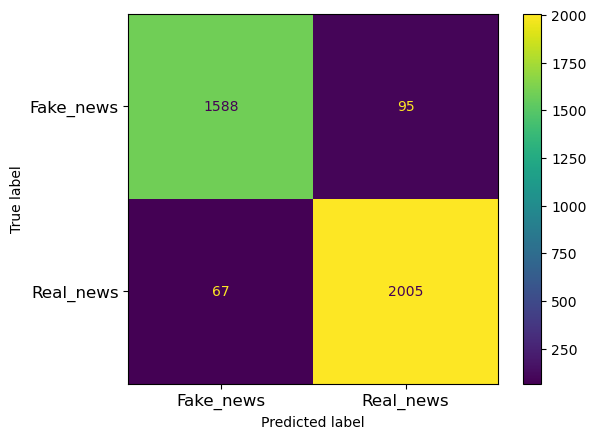

In [44]:
cm = confusion_matrix(y_val, y_val_pred, labels = lr_model_3.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

In [45]:
# Make predictions
y_test_pred = lr_model_3.predict(X_test)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [46]:
accuracy_test

0.92

C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Administrator\anaconda3\envs\base_windows\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

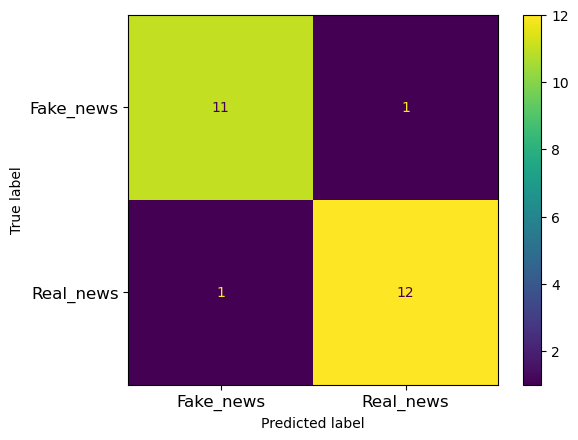

In [47]:
cm = confusion_matrix(y_test, y_test_pred, labels = lr_model_3.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()

In [ ]:
coef_1 = pd.Series(lr_model.coef_[0], index=count_vectorizer_5.get_feature_names_out())